<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 04:  Machine Learning regression**

## **Outline**

1. [Ejercicio 1. Regresión: exploración de kernels SVR](#eje1)
2. [Ejercicio 2. Regresión: reducción de la dimensionalidad con PCA](#eje2)
<!--3. [Ejercicio 3. Multiples clasificadores](#eje3)-->





In [ ]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/IA/ai-uis-student/talleres20202')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6n2jqwOyehb1HGvQHPVKB-2eg0sZH4G85cFfcM25KRa9lSXUJnnnk


In [ ]:
#@title **1. Professor:** MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/main/academic/courses/2018-UIS-AritfitialInteligence/ai-uis-professor/talleres20202')
#os.chdir('/content/drive/My Drive/IA_2020-2/talleres/')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

---
## **Dataset: Crystal System Properties for Li-ion batteries**

Vamos a explorar un dataset que contiene los datos de 339 baterías de iones de litio (Li-ion batteries). El dataset contiene un total de 11 atributos que caracterizan a cada batería, tales como: 

- Formation Energy (eV)
- E Above Hull (eV)
- Band Gap (eV)
- Nsites
- Density (gm/cc)
- Volume
- ...entre otros.

Cada uno de los casos registrados está categorizado de acuerdo a diferentes sistemas cristalinos tales como: "monoclinic" (monoclínico), "orthorhombic" (ortorrómbico) o "triclinic" (triclínico). Observe el dataset en las siguientes lineas y tenga en cuenta el `dataframe` donde quedaron almacenados los valores para ser trabajados en los siguientes puntos. 

[Fuente](https://www.kaggle.com/divyansh22/crystal-system-properties-for-liion-batteries)

---

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


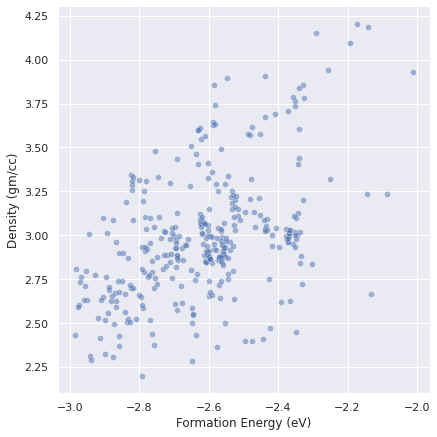

In [ ]:
#@title **Propiedades de las baterías de iones de litio**
variable_x = "Formation Energy (eV)" #@param {type:"string"}
variable_y = "Density (gm/cc)" #@param {type:"string"}
#variable_s = "Density (gm/cc)" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = pd.read_csv("misc/lithium-ion batteries.csv")
vals = np.random.permutation(data.values)

sns.relplot(x=variable_x, y=variable_y, alpha=.5, palette="muted",
            height=6, data=data)

data.head()

# **Ejercicio 1. Regresión: exploración de kernels SVR**  <a name="eje1"></a>

Uno de los grandes desafios en machine learning es ajustar los parámetros de un estimador para responder a un conjunto particular de datos. Muchas veces tenemos que recurrir a la realización de curvas de aprendizaje para explorar los hiperparametros que mejor representan nuestro problema. Teniendo en cuenta lo anterior vamos a hacer una función que explore el parametro `kernel` del **regresor `SVR`** para el dataset de baterías de litio, realizando lo siguiente: 

- Utilizar las características: `Formation Energy (eV)`, `E Above Hull (eV)`, `Band Gap (eV)`, `Nsites`, `Volume`.

- La característica `Density (gm/cc)` será el objetivo de la regresión

- **Se debe permutar el dataset**

- El 80% del dataset se utilizará como train `X_train`, `y_train`

- El 20% del dataset restante se utilizará como test: `X_test`, `y_test`

- Antes de entrenar, debe escalar los datos utilizando `StandardScaler()` obteniendo `X_train_std` y `X_test_std`

- Usando el parámetro `kernel` realice una exploración para los valores: `'linear'`, `'poly'`, `'rbf'`

- Devuelva **una lista** `scores` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

- Posteriormente, utilice **solamente** la característica: `Formation Energy (eV)`.<br>Escale los datos nuevamente con `StandardScaler()` obteniendo `X_train_std` y `X_test_std`.<br>De nuevo, realice la exploración para los valores de kernel: `'linear'`, `'poly'`, `'rbf'`.

- Devuelva **una lista** `scores2` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

- Devuelva **una lista** `predictions` con las **predicciones** para cada uno de los kernels.

- Devuelva los datos de test `X_test_std` previamente escalados. Igualmente, devuelva las etiquetas `y_test`


<b>Referencia Support Vector Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html





In [ ]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_41012521(vals):
    #Your Code Here.
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    import numpy as np
    import pandas as pd
    np.random.seed(23)
    size = vals.shape[0]
    n = int(size*0.8)
    
    X_train = vals[:n, [3,4,5,6,8]]
    y_train = vals[:n, 7]
    X_test =  vals[n:, [3,4,5,6,8]]
    y_test =  vals[n:, 7]
    
    sc = StandardScaler()
    sc.fit(X_train)
    x_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    kernels = ['linear', 'poly', 'rbf']
    scores = []
    predictions = []
    for k in kernels:
      est = SVR(kernel=k)
      est.fit(x_train_std, y_train.ravel())
      p = est.predict(X_test_std)
      scores.append(mean_squared_error(y_test, p))
    
    X_train = vals[:n, 3]
    X_test =  vals[n:, 3]
    sc = StandardScaler()
    sc.fit(X_train.reshape(-1,1))
    x_train_std = sc.transform(X_train.reshape(-1,1))
    X_test_std = sc.transform(X_test.reshape(-1,1))
    sc.fit(x_train_std)

    scores2 = []
    for k in kernels:
      est = SVR(kernel=k)
      est.fit(x_train_std, y_train.ravel())
      p = est.predict(X_test_std)
      predictions.append(p)
      scores2.append(mean_squared_error(y_test, p))
    return scores, scores2, predictions, X_test_std, y_test

import urllib.parse, inspect
src_41012521 = urllib.parse.quote_plus(inspect.getsource(fun_41012521))

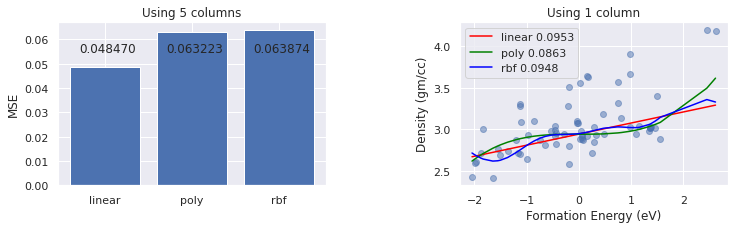

In [ ]:
#@title **verifique su respuesta**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("misc/lithium-ion batteries.csv")
vals = np.random.permutation(data.values)

scores, scores2, predictions, x, y = fun_41012521(vals)

y_ord = []

x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.set_title('Using 5 columns')
ax1.bar(range(0,len(scores)), scores)
ax1.set_xticks(range(0,len(scores)))
ax1.set_xticklabels(('linear', 'poly', 'rbf'))
ax1.set_ylabel('MSE')
ax1.text(-0.3, 0.055, str(scores[0])[:8])
ax1.text(0.7, 0.055, str(scores[1])[:8])
ax1.text(1.7, 0.055, str(scores[2])[:8])

ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='linear '+str(scores2[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='poly '+str(scores2[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='rbf '+str(scores2[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('Formation Energy (eV)')
ax2.set_ylabel('Density (gm/cc)')
ax2.legend()

In [ ]:
#@title **Evalue su respuesta.**

!./run CHECK_SOLUTION PS4_41012521 $src_41012521

evaluation result CORRECT


# **Ejercicio 2. Regresión: reducción de la dimensionalidad con PCA**  <a name="eje2"></a>

Vamos a observar el efecto de reducir la dimensionalidad en el dataset mediante la obtención de diferentes números de componentes principales.

- Utilizar las características: `Formation Energy (eV)`, `E Above Hull (eV)`, `Band Gap (eV)`, `Density (gm/cc)`, `Volume`.

- La característica `Nsites` será el objetivo de la regresión

- **Se debe permutar el dataset**

- El 82% del dataset se utilizará como train `X_train`, `y_train`

- El 18% del dataset restante se utilizará como test: `X_test`, `y_test`

- Utilice como regresores:
  -  SVR con el parámetro `kernel='linear'`
  -  DecisionTreeRegressor con el parámetro `max_depth=10`
  -  RandomForestRegressor con los parámetros `n_estimators=10` y `max_depth=10`

- Para cada regresor, realice una exploración desde 2 hasta 5 componentes principales utilizando PCA.

- Devuelva **una lista** `scores` con los valores de la métrica **RMSE** obtenidos para cada regresor con cada número de componentes principales.

- Posteriormente, utilice **solamente** la característica: `Volume`.

- Utilice como regresores:
  -  SVR con el parámetro `kernel='linear'`
  -  DecisionTreeRegressor con el parámetro `max_depth=10`
  -  RandomForestRegressor con los parámetros `n_estimators=10` y `max_depth=10`

- Devuelva **una lista** `scores2` con los valores de la métrica **RMSE** obtenidos para cada regresor.

- Devuelva los datos de test `X_test_v` para la columna `Volume`. Igualmente, devuelva las etiquetas `y_test`

<b>Referencia Support Vector Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

<b>Referencia Decision Tree Regressor:</b> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

<b>Referencia Random Forest Regressor:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_42012521(vals):
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.decomposition import PCA
    import numpy as np
    import pandas as pd
    np.random.seed(23)

    size = vals.shape[0]
    n = int(size*0.82)
    
    X_train = vals[:n, [3,4,5,7,8]]
    y_train = vals[:n, 6]
    X_test =  vals[n:, [3,4,5,7,8]]
    y_test =  vals[n:, 6]

    nc = range(2,6)
    scores = [[],[],[]]
    scores2 = []
    predictions = []
    
    est = SVR(kernel='linear')
    #iterate through n-principal components
    for i in nc:
        PCA_X_train = PCA(n_components=i).fit_transform(X_train)
        PCA_X_test = PCA(n_components=i).fit_transform(X_test)
        #fit
        est.fit(PCA_X_train, y_train.ravel())
        #predict
        p = est.predict(PCA_X_test)
        #store
        scores[0].append(mean_squared_error(y_test, p, squared = False))

    #DTR estimator
    est = DecisionTreeRegressor(max_depth=10)
    #iterate through n-principal components
    for i in nc:
        PCA_X_train = PCA(n_components=i).fit_transform(X_train)
        PCA_X_test = PCA(n_components=i).fit_transform(X_test)
        #fit
        est.fit(PCA_X_train, y_train)
        #predict
        p = est.predict(PCA_X_test)
        #store
        scores[1].append(mean_squared_error(y_test, p, squared = False))

    #RFR estimator
    est = RandomForestRegressor(n_estimators=10 , max_depth=10)
    #iterate through n-principal components
    for i in nc:
        PCA_X_train = PCA(n_components=i).fit_transform(X_train)
        PCA_X_test = PCA(n_components=i).fit_transform(X_test)
        #fit
        est.fit(PCA_X_train, y_train)
        #predict
        p = est.predict(PCA_X_test)
        #store
        scores[2].append(mean_squared_error(y_test, p, squared = False))

    X_train_v = vals[:n, 8]
    X_test_v = vals[n:, 8]

    #SVR estimator
    est = SVR(kernel='linear')
    #fit
    est.fit(X_train_v.reshape(-1,1), y_train.reshape(-1,1).ravel())
    #predict
    p = est.predict(X_test_v.reshape(-1,1))
    #store score
    scores2.append(mean_squared_error(y_test, p, squared = False))
    #store prediction
    predictions.append(p)

    #DTR estimator
    est = DecisionTreeRegressor(max_depth=10)
    #fit
    est.fit(X_train_v.reshape(-1,1), y_train.reshape(-1,1).ravel())
    #predict
    p = est.predict(X_test_v.reshape(-1,1))
    #store score
    scores2.append(mean_squared_error(y_test, p, squared = False))
    #store prediction
    predictions.append(p)

    #RFR estimator
    est = RandomForestRegressor(n_estimators=10 , max_depth=10)
    #fit
    est.fit(X_train_v.reshape(-1,1), y_train.reshape(-1,1).ravel())
    #predict
    p = est.predict(X_test_v.reshape(-1,1))
    #store score
    scores2.append(mean_squared_error(y_test, p, squared = False))
    #store prediction
    predictions.append(p)
    
    return scores, scores2, predictions, X_test_v, y_test

import urllib.parse, inspect
src_42012521 = urllib.parse.quote_plus(inspect.getsource(fun_42012521))


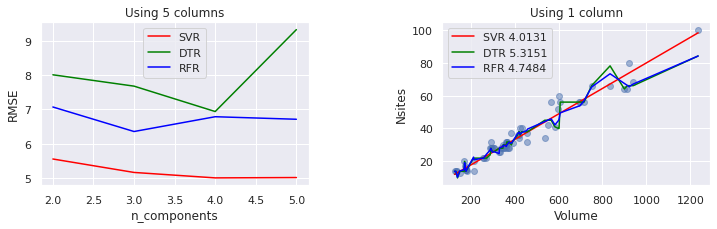

In [ ]:
#@title **verifique su respuesta**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("misc/lithium-ion batteries.csv")
vals = np.random.permutation(data.values)

scores, scores2, predictions, x, y = fun_42012521(vals)

y_ord = []
x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.set_title('Using 5 columns')
ax1.plot(range(2,len(scores[0])+2), scores[0], c='red', label='SVR')
ax1.plot(range(2,len(scores[1])+2), scores[1], c='green', label='DTR')
ax1.plot(range(2,len(scores[2])+2), scores[2], c='blue', label='RFR')
ax1.set_xlabel('n_components')
ax1.set_ylabel('RMSE')
ax1.legend()

ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='SVR '+str(scores2[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='DTR '+str(scores2[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='RFR '+str(scores2[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('Volume')
ax2.set_ylabel('Nsites')
ax2.legend()

In [ ]:
#@title **Evalue su respuesta.**

!./run CHECK_SOLUTION PS4_42012521 $src_42012521 

3.8588547826569104
3.8588547826569104
4.100194201020691
4.100194201020691
evaluation result CORRECT


# **Pasos Finales.**


#### 1. Reemplace la variable con su código de estudiante

In [1]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_04_20202" #@param {type:"string"}
codigo_name = "tl4_2172969" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_std_04_20202 tl4_2172969


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: tl4_2172969 dos Taller_prof_04_20202
cp: cannot stat 'Taller_prof_04_20202.ipynb': No such file or directory
ERROR!: NO FUE POSIBLE CREAR EL ARCHIVO!.


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>